* **Log Transformation of Features**:
    - Applying log transformation to features to make data more normally distributed.
* **Log Transformation of the Target Variable**: 
    - Applying log transformation to the target variable in regression problems to stabilize variance and make the distribution more normal.    

**When to Use Log Transformation**
- When Data is Skewed: 
    - If your data is right-skewed, log transformation can make it more symmetric.
- When Variance is Heteroscedastic: 
    - If the variance of your data changes across levels, log transformation can stabilize it.
- When Relationships are Non-Linear: 
    - If the relationship between variables is multiplicative or exponential, log transformation can linearize it.
- When Dealing with Outliers: 
    - If outliers heavily influence your model, log transformation can reduce their impact.

# Applying Log Transformation

### Linear Regression

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Sample dataset
data = {
    'X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Y': [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
}
df = pd.DataFrame(data)

# Log transformation
df['log_X'] = np.log1p(df['X'])
df['log_Y'] = np.log1p(df['Y'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df[['log_X']], df['log_Y'], test_size=0.2, random_state=42)

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'R^2: {model.score(X_test, y_test)}')

# Using statsmodels for detailed output
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())


Coefficients: [2.30828562]
Intercept: -0.8937374562545592
R^2: 0.9996718564561341
                            OLS Regression Results                            
Dep. Variable:                  log_Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.397e+04
Date:                Sat, 06 Jul 2024   Prob (F-statistic):           7.94e-13
Time:                        00:27:37   Log-Likelihood:                 23.028
No. Observations:                   8   AIC:                            -42.06
Df Residuals:                       6   BIC:                            -41.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

C:\Users\Upendra\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Logistic Regression
- For logistic regression, one can apply log transformation to the independent variables to stabilize variance and reduce skewness:

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Sample dataset
data = {
    'X1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'X2': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'Y': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)

# Log transformation
df['log_X1'] = np.log1p(df['X1'])
df['log_X2'] = np.log1p(df['X2'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df[['log_X1', 'log_X2']], df['Y'], test_size=0.2, random_state=42)

# Logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5
[[0 1]
 [0 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\Upendra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Upendra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Upendra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['target'] = california_housing.target

# Display first few rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Step 2: Apply Log Transformation to a Feature

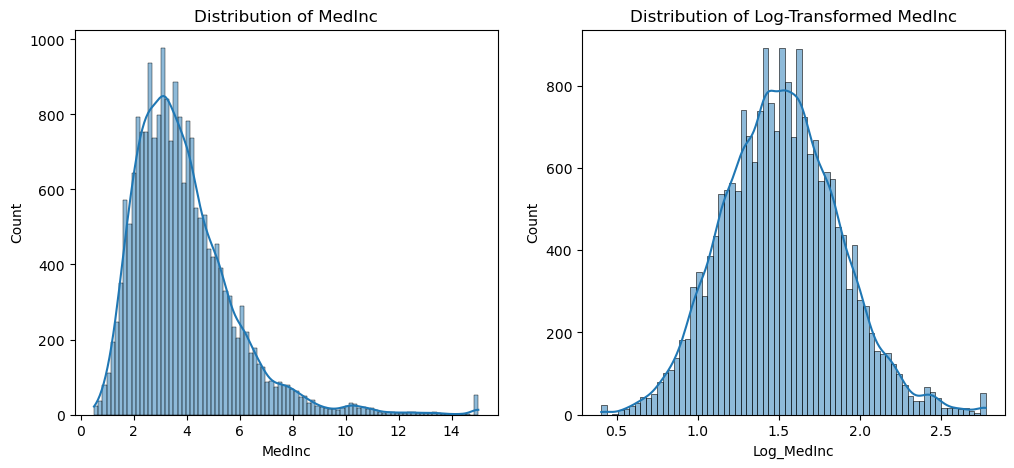

In [9]:
# Apply log transformation to the 'MedInc' feature
df['Log_MedInc'] = np.log1p(df['MedInc'])

# Plot the distribution before and after log transformation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['MedInc'], kde=True)
plt.title('Distribution of MedInc')

plt.subplot(1, 2, 2)
sns.histplot(df['Log_MedInc'], kde=True)
plt.title('Distribution of Log-Transformed MedInc')

plt.show()


###  Log Transformation of the Target Variable

In [12]:
# Display first few rows of the dataset
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,Log_MedInc
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.232720
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2.230165
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.111110
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1.893579
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1.578195


Step 2: Apply Log Transformation to the Target Variable

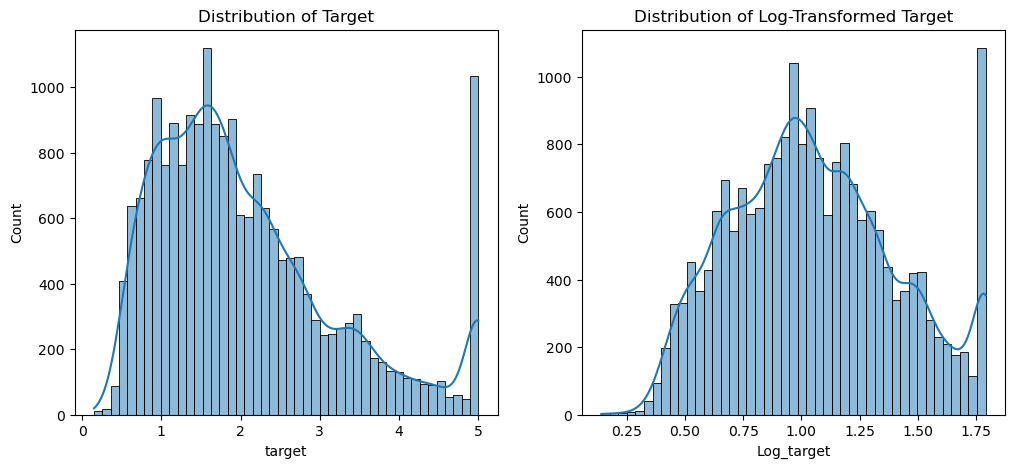

In [15]:
# Apply log transformation to the target variable
df['Log_target'] = np.log1p(df['target'])

# Plot the distribution before and after log transformation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['target'], kde=True)
plt.title('Distribution of Target')

plt.subplot(1, 2, 2)
sns.histplot(df['Log_target'], kde=True)
plt.title('Distribution of Log-Transformed Target')

plt.show()


### Step 3: Split the Data into Training and Testing Sets
We'll split the data into training and testing sets for model building and evaluation.

In [17]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns='Log_target')
y = df['Log_target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 4: Train a Linear Regression Model
We'll train a linear regression model using the transformed data.

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.003328506436208045
R^2 Score: 0.9735925833071775


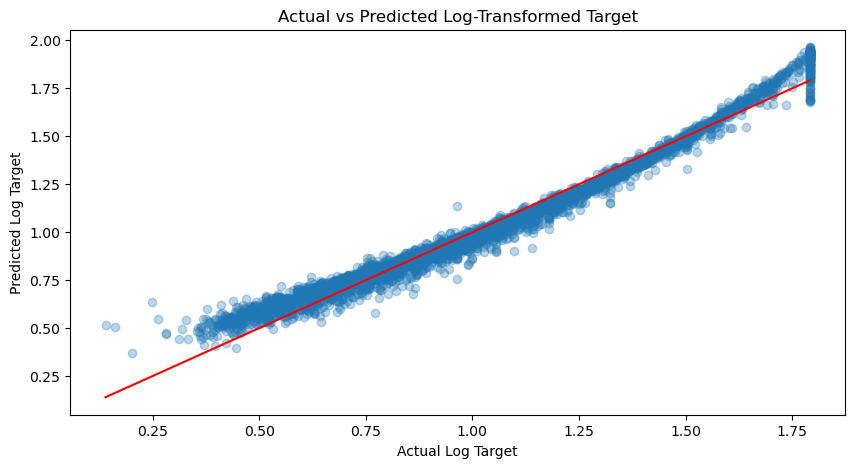

In [33]:
# Plotting the predictions vs actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Log Target')
plt.ylabel('Predicted Log Target')
plt.title('Actual vs Predicted Log-Transformed Target')
plt.show()